# Modal Solver

> A solver for the 1D wave equation based on the modal decomposition

In [ ]:
# | default_exp solver.wave1d_modal

This is a solver based on the analytic modal decomposition for a 1D wave equation.
The wave equation is given by:
$$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}$$

Solving this equation using separation of variables, we use the following ansatz
$$u(x,t) = X(x)T(t)$$
which leads to the following equation:
$$\frac{1}{c^2}\frac{1}{T(t)}\frac{d^{2} T }{dt^{2}} = \frac{1}{X(x)}\frac{d^{2} X}{dx^{2}} = -k^{2}$$
where $k$ is a constant

$$\frac{1}{T(t)}\frac{d^{2} T }{dt^{2}} = -c^{2}k^{2} \equiv - \omega^{2}$$

The solutions are therefore
$$X(x) = C\cos(kx) + D\sin(kx)$$
$$T(t) = E\cos(\omega t) + F\sin(\omega t)$$

Using the boundary conditions, we can get an expression for the allowed values of $k$

### Dirichlet on both ends
$$u(0,t) = u(L,t) = 0$$
$$X(0) = X(L) = 0$$
$$C = 0$$
$$k = \frac{n\pi}{L}$$
with n = 1,2,3,...
And the eigenmodes are
$$X_{n}(x) = D_{n}\sin(k_{n}x)$$
The complete solution then is
$$u(x,t) = \sum_{n=1}^{\infty} D_{n}\sin(k_{n}x)\left(E_{n}\cos(\omega_{n}t) + F_{n}\sin(\omega_{n}t)\right)$$
Using $A_{n} = D_{n}E_{n}$ and $B_{n} = D_{n}F_{n}$, we get
$$u(x,t) = \sum_{n=1}^{\infty} \sin(k_{n}x) \left(A_{n}\cos(\omega_{n}t) + B_{n}\sin(\omega_{n}t)\right)$$
The derivative, $v(x,t) = \frac{\partial u}{\partial t}$, is given by
$$v(x,t) = \sum_{n=1}^{\infty} \sin(k_{n}x) \left(-A_{n}\omega_{n}\sin(\omega_{n}t) + B_{n}\omega_{n}\cos(\omega_{n}t)\right)$$

To determine the coefficients $A_{n}$ and $B_{n}$, we use the initial conditions
$$u(x,0) = f(x)$$
$$\frac{\partial u}{\partial t}(x,0) = g(x)$$
which gives
$$f(x) = \sum_{n=1}^{\infty} A_{n}\sin(k_{n}x)$$
$$g(x) = \sum_{n=1}^{\infty} B_{n}\omega_{n}\sin(k_{n}x)$$

As $k_{n}=n\pi/L$, we can see that summations correspond to a Fourier sine series expansion of $f(x)$ and $g(x)$. This assumes that $f(x)$ and $g(x)$ are odd functions, which is the case for the initial conditions, if we consider a periodic extension of the initial conditions, with period $2L$. The initial conditions need to fulfill the boundary conditions, which means that $f(0)=f(L)=0$ and, consequently $g(0)=g(L)=0$. This is the case for odd functions, and therefore we can use the Fourier sine series expansion.

Then the coefficients are given by
$$A_{n} = \frac{2}{L}\int_{0}^{L} f(x)\sin(k_{n}x) dx$$
$$B_{n} = \frac{2}{L\omega_{n}}\int_{0}^{L} g(x)\sin(k_{n}x) dx$$



### Neumann on both ends
$$\frac{\partial u}{\partial x}(0,t) = \frac{\partial u}{\partial x}(L,t) = 0$$
$$\frac{dX}{dx}(0) = \frac{dX}{dx}(L) = 0$$
$$D = 0$$
$$k = \frac{n\pi}{L}$$
with n = 0,1,2,3,...
And the eigenmodes are
$$X_{n}(x) = C_{n}\cos(k_{n}x)$$

The difference between the Dirichlet and Neumann boundary conditions is the allowed values of n, and the form of the eigenfunctions, but the wavenumbers and modal frequencies are the same (except the existence of the zero frequency mode for the Neumann boundary conditions). For n=0, the solution $u(x,t)$ is a constant, corresponding to the zero frequency mode.
This is the rigid motion of the string, or air column, or whatever is being modeled.

The complete solution then is
$$u(x,t) = \sum_{n=0}^{\infty} C_{n}\cos(k_{n}x)\left(E_{n}\cos(\omega_{n}t) + F_{n}\sin(\omega_{n}t)\right)$$
Using $A_{n} = C_{n}E_{n}$ and $B_{n} = C_{n}F_{n}$, we get
$$u(x,t) = \sum_{n=0}^{\infty} \cos(k_{n}x) \left(A_{n}\cos(\omega_{n}t) + B_{n}\sin(\omega_{n}t)\right)$$

To determine the coefficients $A_{n}$ and $B_{n}$, we use the initial conditions
$$u(x,0) = f(x)$$
$$\frac{\partial u}{\partial t}(x,0) = g(x)$$
which can be expressed as cosine series
$$f(x) = \frac{A_{0}}{2} + \sum_{n=1}^{\infty} A_{n}\cos(k_{n}x)$$
$$g(x) = \frac{B_{0}}{2} + \sum_{n=1}^{\infty} B_{n}\omega_{n}\cos(k_{n}x)$$

**Note on initial velocity**

As $k_{n}=n\pi/L$, we can see that summations correspond to a Fourier cosine series expansion of $f(x)$ and $g(x)$. This assumes that $f(x)$ and $g(x)$ are even functions, which is the case for initial conditions that also fulfil the boundary conditions, $\frac{\partial u}{\partial x}(0,t) = \frac{\partial u}{\partial x}(L,t) = 0$ , if we consider a periodic extension of the initial conditions $[-L,L]$, with period $2L$.
The initial velocity definitily needs to be even, as its derivative has to be 0 for x=0



### Dirichlet on one end, Neumann on the other
$$u(0,t) = 0$$
$$\frac{\partial u}{\partial x}(L,t) = 0$$
$$C = 0$$
$$k = \frac{(n-\frac{1}{2})\pi}{L}$$
with n = 1,2,3,...


 

$$(u_{n+1} -2u_{n} +u_{n-1})/k^2 = c^2 Dxx u_n$$

In [ ]:
# | export
import jax.numpy as jnp
import scipy.integrate as integrate
import numpy as np
import jax

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# | export
class Wave1dSolverModal:
    def __init__(
        self,
        sampling_rate: int = 48000,  # sampling rate, Hz (default: 48000)
        final_time: float = 1.0,  # final time of the simulation, seconds (default: 1)
        n_gridpoints: int = 101,  # number of grid points (default: 101)
        length: float = 1,  # length of the domain, meters (default: 1)
        wave_speed: float = 1,  # wave speed, meters/second (default: 1)
        boundary_conditions: str = "dirichlet_dirichlet",  # boundary conditions, either "dirichlet_dirichlet", "neumann_neumann", "dirichlet_neumann" (default: "dirichlet_dirichlet")
        n_max_modes: int = 50,  # number of eigenmodes to calculate (default: 50)
    ) -> None:
        # Attributes intrinsic to the Wave Equation PDE
        self.pde_num_variables = 1
        self.pde_num_spatial_dimensions = 1
        self.pde_order_time_derivatives = 2

        # Attributes of the simulation
        self.sampling_rate = sampling_rate
        self.final_time = final_time
        self.n_gridpoints = n_gridpoints
        self.length = length
        self.wave_speed = wave_speed
        self.boundary_conditions = boundary_conditions

        # For Dirichlet BC, the number of possible modes is equal the the number of points in the interior of the domain
        if n_max_modes > n_gridpoints - 2:
            self.n_max_modes = n_gridpoints - 2
            print(f"n_max_modes too high, setting to {self.n_max_modes}")
        else:
            self.n_max_modes = n_max_modes

        self.grid = self._create_grid()
        self.dx = self.grid[1] - self.grid[0]
        self.dt = 1 / self.sampling_rate
        self.timesteps = jnp.arange(0, self.final_time, self.dt)
        self.wavenumbers = self._calculate_mode_wavenumbers()
        self.omegas = self._calculate_mode_angular_frequencies()
        self.modes = self._calculate_mode_shapes()

        print(f"dx: {self.dx} in meters")
        print(f"dt: {self.dt} in seconds")
        print(f"number of points (n_gridpoints): {self.grid.shape}")
        print(f"time in samples (nt): {self.timesteps.shape}")

    def _create_grid(self) -> jnp.ndarray:
        return jnp.linspace(0, self.length, self.n_gridpoints)

    def _calculate_mode_wavenumbers(self) -> jnp.ndarray:
        if self.boundary_conditions == "dirichlet_dirichlet":
            wavenumbers = jnp.array(
                [jnp.pi * n / self.length for n in range(1, self.n_max_modes + 1)]
            )
        elif self.boundary_conditions == "neumann_neumann":
            wavenumbers = jnp.array(
                [jnp.pi * n / self.length for n in range(0, self.n_max_modes)]
            )
        elif self.boundary_conditions == "dirichlet_neumann":
            wavenumbers = jnp.array(
                [
                    jnp.pi * (n - 0.5) / self.length
                    for n in range(1, self.n_max_modes + 1)
                ]
            )
        else:
            raise ValueError(
                "boundary_conditions must be either 'dirichlet_dirichlet', 'neumann_neumann', or 'dirichlet_neumann'"
            )
        return wavenumbers

    def _calculate_mode_angular_frequencies(self) -> jnp.ndarray:
        return self.wave_speed * self.wavenumbers

    def _calculate_mode_shapes(self) -> jnp.ndarray:
        # Size of modes is (n_max_modes, n_gridpoints)
        if self.boundary_conditions == "dirichlet_dirichlet":
            modes = jnp.array(
                [
                    jnp.sin(self.wavenumbers[n] * self.grid)
                    for n in range(0, self.n_max_modes)
                ]
            )
        elif self.boundary_conditions == "neumann_neumann":
            modes = jnp.array(
                [
                    jnp.cos(self.wavenumbers[n] * self.grid)
                    for n in range(0, self.n_max_modes)
                ]
            )
        elif self.boundary_conditions == "dirichlet_neumann":
            modes = jnp.array(
                [
                    jnp.sin(self.wavenumbers[n] * self.grid)
                    for n in range(0, self.n_max_modes)
                ]
            )
        else:
            raise ValueError(
                "boundary_conditions must be either 'dirichlet_dirichlet', 'neumann_neumann', or 'dirichlet_neumann'"
            )
        return modes

    def _calculate_mode_coefficients(
        self,
        u0: jnp.ndarray = None,  # initial displacement (default: None)
        v0: jnp.ndarray = None,  # initial velocity (default: None)
    ):
        # check that each mode and initial conditions are the same size
        if self.modes.shape[1] != u0.shape[0]:
            raise ValueError(
                "modes and u0 must have the same number of grid points (modes.shape[1] != u0.shape[0])"
            )
        if self.modes.shape[1] != v0.shape[0]:
            raise ValueError(
                "modes and v0 must have the same number of grid points (modes.shape[1] != v0.shape[0])"
            )
        # calculate the coefficients of the sine/cosine series representing the initial conditions
        # We assume that the initial conditions can be indeed represented as a sine/cosine series
        coeffs_a = jnp.array(
            (2 / self.length) * integrate.trapezoid(self.modes * u0, self.grid)
        )
        coeffs_b = jnp.array(
            (2 / (self.length * self.omegas))
            * integrate.trapezoid(self.modes * v0, self.grid)
        )
        # Coorection to the 0 frequency mode for neumann_neumann boundary conditions,
        if self.boundary_conditions == "neumann_neumann":
            coeffs_a[0] /= 2.0
            coeffs_b[0] /= 2.0

        return (coeffs_a, coeffs_b)

    def create_initial_conditions(
        self,
        key: jnp.ndarray = None,  # random key for jax random number generator (default: None)
        type: str = "gaussian",  # type of initial condition, only gaussian implemented atm (default: "gaussian")
        x0: float = 0.5,  # location of the initial condition, relative to string length (default: 0.5)
        sigma: float = 0.1,  # width of the gaussian, relative to string length (default: 0.1)
        amplitude: float = 1,  # amplitude of the initial condition (default: 1)
    ) -> tuple[jnp.ndarray, jnp.array]:
        """This method creates the initial conditions, u0 and v0, for the simulation.
        Current implementation only supports plucks (v0=0) both gaussian and noise."""
        # Only gaussian pluck (v0=0) implemented atm
        # Depending on the type of boundary conditions, the initial condition needs to be adjusted
        # For dirichlet_dirichlet, the initial displacement and velocity need to be 0 at the end points

        # check that grid is provided
        if type == "gaussian":
            u0 = amplitude * jnp.exp(
                -((self.grid - x0 * self.length) ** 2)
                / (2 * (sigma * self.length) ** 2)
            )
            v0 = jnp.zeros(self.grid.shape)
        elif type == "noise":
            # Check that a key is provided
            if key is None:
                raise ValueError(
                    "For noise initial conditions, a key for the jax random number generator must be provided"
                )
            u0 = jax.random.uniform(key, shape=self.grid.shape, minval=-1, maxval=1)
            v0 = jnp.zeros(self.grid.shape)

        else:
            raise ValueError("type must be either 'gaussian' ")

        # Enforce boundary conditions
        if self.boundary_conditions == "dirichlet_dirichlet":
            u0 = u0.at[0].set(0.0)
            u0 = u0.at[-1].set(0.0)
            v0 = v0.at[0].set(0.0)
            v0 = v0.at[-1].set(0.0)
        elif self.boundary_conditions == "neumann_neumann":
            # Assert that for neumann_neumann boundary conditions, the initial velocity is 0 for the whole domain
            # this is not strictly necessary, but is good precaution until a safe way to set initial velocity in this case is implemented
            if not jnp.all(v0 == 0):
                raise ValueError(
                    "For neumann_neumann boundary conditions, the initial velocity must be 0 for the whole domain"
                )
        elif self.boundary_conditions == "dirichlet_neumann":
            u0 = u0.at[0].set(0.0)
            v0 = v0.at[0].set(0.0)

        return (u0, v0)

    def solve(
        self,
        u0: jnp.ndarray = None,  # initial displacement (default: None)
        v0: jnp.ndarray = None,  # initial velocity (default: None)
    ) -> tuple[jnp.ndarray, jnp.array, jnp.array]:
        # project initial conditions onto the modes
        coeffs_a, coeffs_b = self._calculate_mode_coefficients(u0, v0)

        @jax.jit
        def _solve_single_time(t, coeffs_a, coeffs_b):
            u_t = jnp.sum(
                (
                    coeffs_a[..., None] * jnp.cos(self.omegas * t)[..., None]
                    + coeffs_b[..., None] * jnp.sin(self.omegas * t)[..., None]
                )
                * self.modes,
                axis=0,
            )
            v_t = jnp.sum(
                (
                    -1
                    * coeffs_a[..., None]
                    * self.omegas[..., None]
                    * jnp.sin(self.omegas * t)[..., None]
                    + coeffs_b[..., None]
                    * self.omegas[..., None]
                    * jnp.cos(self.omegas * t)[..., None]
                )
                * self.modes,
                axis=0,
            )
            return u_t, v_t

        solve_fn_vmap = jax.vmap(_solve_single_time, in_axes=(0, None, None))
        u, v = solve_fn_vmap(self.timesteps, coeffs_a, coeffs_b)

        return (self.timesteps, u, v)

dx: 0.009999999776482582 in meters
dt: 2.0833333333333333e-05 in seconds
number of points (n_gridpoints): (101,)
time in samples (nt): (48000,)
[2.         1.         0.6666667  0.5        0.4        0.33333334
 0.2857143  0.25       0.22222222 0.2        0.18181819 0.16666667
 0.15384616 0.14285715 0.13333334 0.125      0.11764707 0.11111111
 0.10526316 0.1        0.0952381  0.09090909 0.08695652 0.08333334
 0.08       0.07692308 0.07407408 0.07142857 0.06896552 0.06666667
 0.06451613 0.0625     0.06060607 0.05882353 0.05714286 0.05555556
 0.05405405 0.05263158 0.05128206 0.05       0.04878049 0.04761905
 0.04651163 0.04545455 0.04444445 0.04347826 0.04255319 0.04166667
 0.04081633 0.04      ]


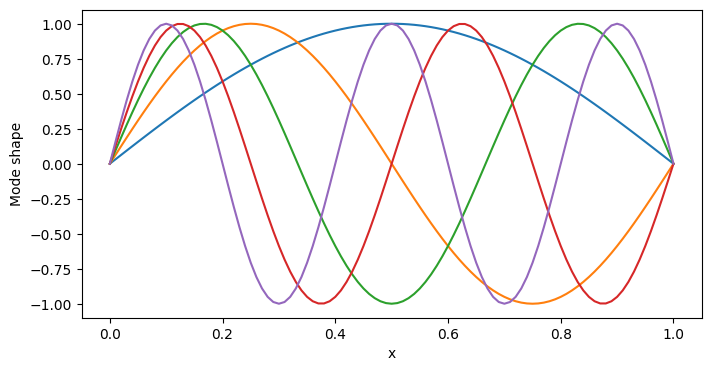

(48000,)
0.99997914
<class 'jaxlib.xla_extension.ArrayImpl'>
<class 'float'>


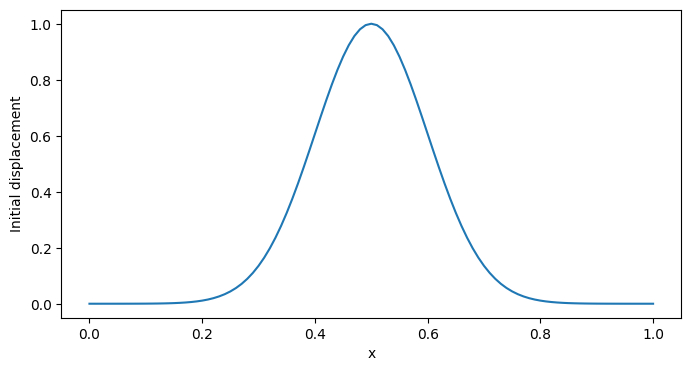

In [ ]:
# Test that the solver class is working
solver = Wave1dSolverModal(
    final_time=1,
    length=1,
    wave_speed=1,
    boundary_conditions="dirichlet_dirichlet",
)
print(2 * jnp.pi / solver.wavenumbers)

# plot the first 5 mode shapes
plt.figure(figsize=(8, 4))
plt.plot(solver.grid, solver.modes[:5, :].T)  # plot the first 5 mode shapes
plt.xlabel("x")
plt.ylabel("Mode shape")
plt.show()

print(solver.timesteps.shape)
print(solver.timesteps[-1])

# print the types for the solver attributes
print(type(solver.grid))
print(type(float(solver.timesteps[0])))

key = jax.random.PRNGKey(0)
# create initial conditions
u0, v0 = solver.create_initial_conditions(key=key, type="gaussian", x0=0.5, sigma=0.1)

# Plot initial displacement
plt.figure(figsize=(8, 4))
plt.plot(solver.grid, u0)
plt.xlabel("x")
plt.ylabel("Initial displacement")
plt.show()

In [ ]:
# solve the system with the class method
(t, u, v) = solver.solve(u0=u0, v0=v0)
print(u.shape)
print(v.shape)
print(t.shape)

(48000, 101)
(48000, 101)
(48000,)


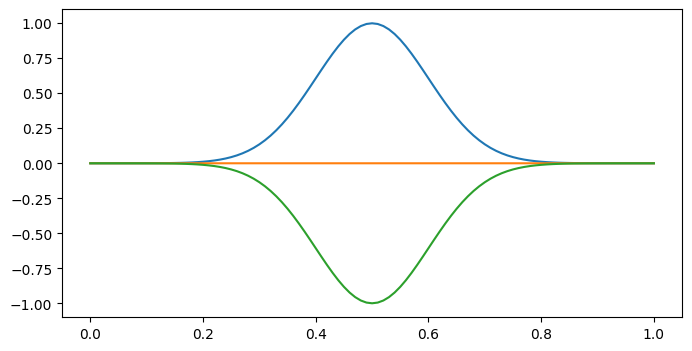

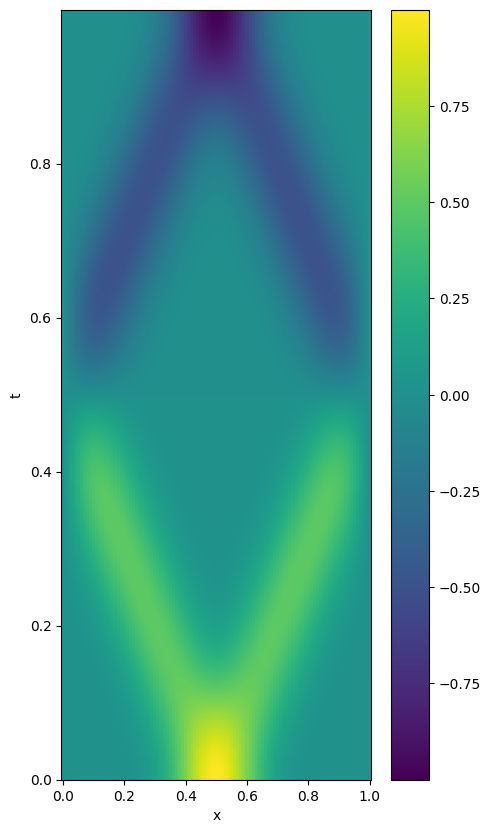

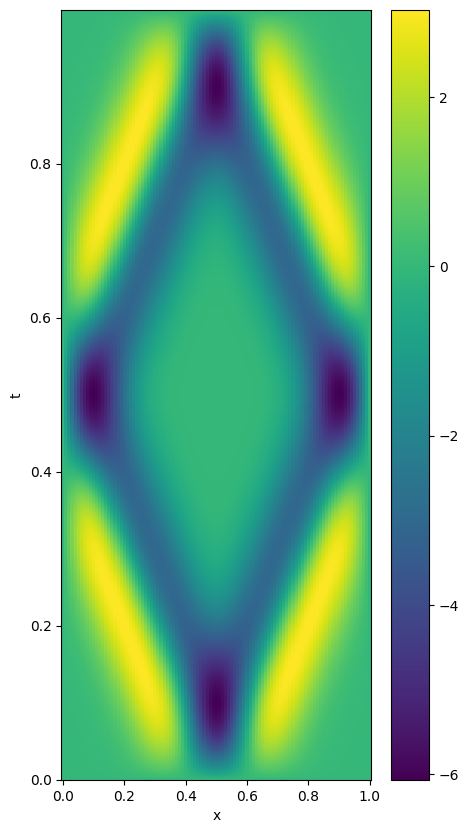

In [ ]:
# Plot solution at different times, start middle and end
plt.figure(figsize=(8, 4))
plt.plot(solver.grid, u[0, :], label="t=0")
plt.plot(solver.grid, u[int(u.shape[0] / 2), :], label="t=0.5")
plt.plot(solver.grid, u[-1, :], label="t=1")
# show the solution viewed from above
plt.figure(figsize=(5, 10))
plt.pcolormesh(solver.grid, t, u)
plt.xlabel("x")
plt.ylabel("t")
plt.colorbar()
plt.show()

# show the solution v viewed from above
plt.figure(figsize=(5, 10))
plt.pcolormesh(solver.grid, t, v)
plt.xlabel("x")
plt.ylabel("t")
plt.colorbar()
plt.show()